## 10. 딥러닝 모델 설계하기

### 10.1 모델의 정의

+ 폐암 수술 환자의 생존율 예측하기

In [24]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터를 다루는데 필요한 라이브러리
import numpy as np

In [1]:
# 데이터 불러오기
data_set = np.loadtxt('c:/reposit/data/모두의 딥러닝/ThoraricSurgery3.csv', delimiter=',')

X = data_set[:, 0:16] # 환자의 진찰 기록을 X로 지정
y = data_set[:, 16] # 수술 1년 후 사망/생존 여부를 y로 지정

# 딥러닝 모델 구조를 결정
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 모델을 실행
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 3ms/step - loss: 14.6531 - accuracy: 0.1489
Epoch 2/5
30/30 [==============================] - 0s 3ms/step - loss: 4.9664 - accuracy: 0.1723
Epoch 3/5
30/30 [==============================] - 0s 4ms/step - loss: 0.5685 - accuracy: 0.7766
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4764 - accuracy: 0.8511


### 10.2 입력층, 은닉층, 출력층

In [2]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### 10.3 모델 컴파일

In [3]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 10.4 모델 실행하기

In [4]:
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 3ms/step - loss: 0.6394 - accuracy: 0.7468
Epoch 2/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8511
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.8511
Epoch 5/5
30/30 [==============================] - 0s 3ms/step - loss: 0.4191 - accuracy: 0.8511


## 11. 데이터 다루기

### 11.1 딥러닝과 데이터

### 11.2 피마 인디언 데이터 분석하기

### 11.3 판다스를 활용한 데이터 조사

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('c:/reposit/data/모두의 딥러닝/pima-indians-diabetes3.csv')
df.head(3)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [5]:
df.shape

(768, 9)

In [6]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [7]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


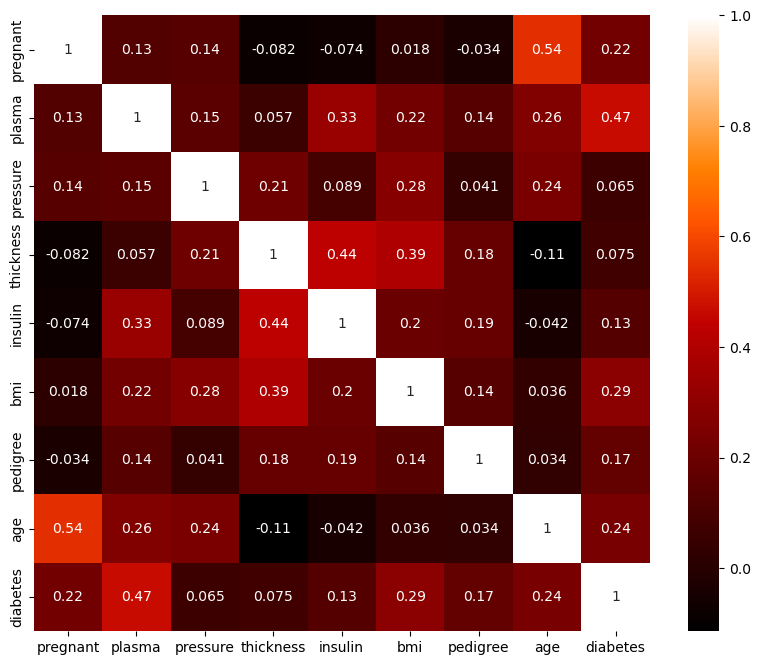

In [10]:
colormap = plt.cm.gist_heat

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap=colormap, annot=True, square=True, linecolor='white')
plt.show()

### 11.4 중요한 데이터 추출하기

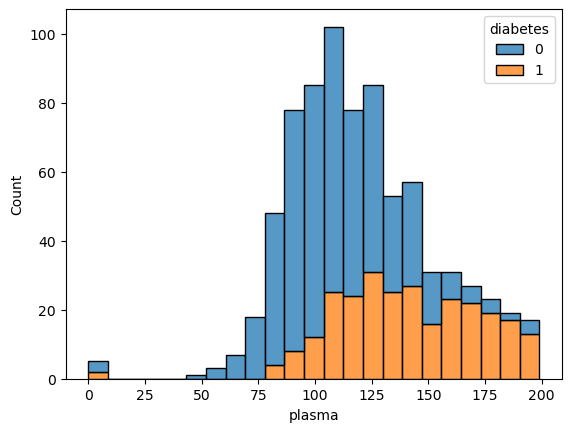

In [18]:
sns.histplot(data=df, x='plasma', hue='diabetes', multiple='stack')
plt.show()

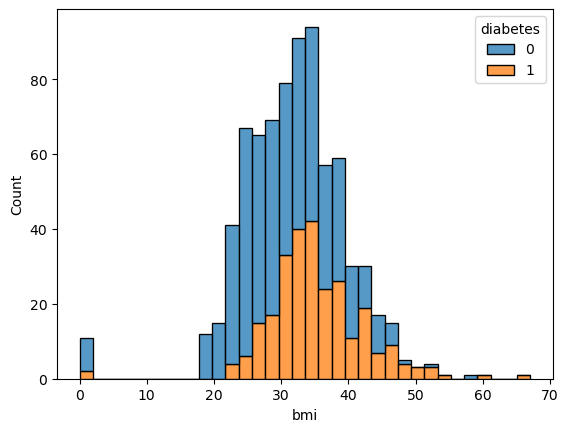

In [19]:
sns.histplot(data=df, x='bmi', hue='diabetes', multiple='stack')
plt.show()

### 11.5 피마 인디언의 당뇨병 예측 실행

In [23]:
X = df.iloc[:, :8]
y = df.iloc[:, 8]

In [25]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(8, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid', name='Dense_3'))
model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(X, y, epochs=100, batch_size=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 12)                108       
                                                                 
 Dense_2 (Dense)             (None, 8)                 104       
                                                                 
 Dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
154/154 [==============================] - 2s 4ms/step - loss: 2.4264 - accuracy: 0.5312
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.6432
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6602
Epoch 4/100
154/1